# Automation is replacing humanbeings day to day in every industry. In the same way in data science also automation is increasing day to day such as "pycaret, pandas profiling and others". In the same way I just implemented an automation code for time series forecasting to predict stock prices for the next day company wise or on whole by using basic ARIMA to deeplerning LSTM model including Facebook Prophet model. I am working on it and this is not the final automated code, still I am improving day to day. My aim is to convert this code into a module and publish in PyPi packages website and get selected with them and made my module to deploy in python environment. 

# As much as automation increases it cannot replace humans in some areas expecially in data science i.e feature engineering, finding business solution, Imputating outlyers with best methods KNN, MICE according to data.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
std=StandardScaler()
from statsmodels.tools.eval_measures import rmse

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [3]:
import warnings
warnings.filterwarnings('ignore')

Enter dataset file name : prices-split-adjusted
Enter format of the file "csv" or "excel" : csv


Enter the column name of the date : date


Enter the format of the date from the above tabel (e.g %d-%Y-%m): %d-%m-%Y


Enter the name of the feature you want to forecast on : high


Do you want to forecast high on any category in the features (eg:- country(India)) or want to forecast high on whole (Yes/No) : Yes


Enter the feature name from which who want to pick the category (eg:- country): symbol
Ente the category name from symbol to forecast high   : YHOO


Root Mean Square Error for ARIMA Model:  2.4041934728383065


Enter number of days to forecast ? :25


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




Root Mean Squared Error for Prophet Model:  10.271393795254122


Epoch 1/5
1584/1584 [==============================] - 108s 68ms/step - loss: 510911.0294
Epoch 2/5
1584/1584 [==============================] - 106s 67ms/step - loss: 7.8969e-04
Epoch 3/5
1584/1584 [==============================] - 102s 64ms/step - loss: 7.1759e-04
Epoch 4/5
1584/1584 [==============================] - 103s 65ms/step - loss: 6.3481e-04
Epoch 5/5
1584/1584 [==============================] - 109s 69ms/step - loss: 5.7066e-04


Root Mean Square Error for LSTM Model:  6.548746207672902


Epoch 1/5
1673/1673 [==============================] - 114s 68ms/step - loss: 4.5687e-04
Epoch 2/5
1673/1673 [==============================] - 116s 69ms/step - loss: 3.9509e-04
Epoch 3/5
1673/1673 [==============================] - 108s 65ms/step - loss: 3.4251e-04
Epoch 4/5
1673/1673 [==============================] - 100s 60ms/step - loss: 3.2311e-04
Epoch 5/5
1673/1673 [==============================] - 109s 65ms/step

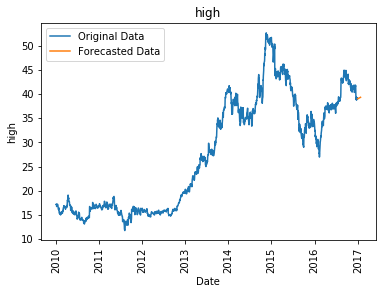

In [6]:
d1=str(input('Enter dataset file name : '))
d2=str(input('Enter format of the file "csv" or "excel" : ' ))
print('\n')
if d2=='csv':
    d1=d1+'.csv'
    d3=pd.read_csv(d1)
elif d2=='excel':
    d1=d1+'.xlsx'
    d3=pd.read_excel(d1)
s1=str(input('Enter the column name of the date : '))
print('\n')
s2=str(input('Enter the format of the'+' '+s1+' '+'from the above tabel (e.g %d-%Y-%m): ' ))
print('\n')
s4=str(input('Enter the name of the feature you want to forecast on : '))
print('\n')
d3[s1]=pd.to_datetime(d3[s1], format=s2, infer_datetime_format=True)
s5=str(input('Do you want to forecast'+' '+s4+' '+'on any category in the features (eg:- country(India)) or want to forecast'+' '+s4+' '+'on whole (Yes/No) : '))
print('\n')
if s5=='No':
    datewise=d3.groupby([s1]).agg({s4:'sum'})
elif s5=='Yes':
    s6=str(input('Enter the feature name from which who want to pick the category (eg:- country): '))
    s7=str(input('Ente the category name from'+' '+s6+' '+'to forecast'+' '+s4+' '+'  : '))
    s8=d3[d3[s6]==s7]
    datewise=s8.groupby([s1]).agg({s4:'sum'})
    
    
#ARIMA
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()
list4=[]
small=float('inf')
def augmented_dickey_fuller(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
augmented_dickey_fuller(model_train[s4])
if augmented_dickey_fuller(model_train[s4])[1]<0.05:
    model_train[s4]=model_train[s4]
elif augmented_dickey_fuller(model_train[s4])[1]>0.05:
    augmented_dickey_fuller(np.log1p(model_train[s4]))
    list4.append(augmented_dickey_fuller(np.log1p(model_train[s4]))[1])
    log_series=np.log1p(model_train[s4])
    diff1=(log_series.diff()).dropna()
    list4.append(augmented_dickey_fuller(diff1)[1])
    diff2=(diff1.diff()).dropna()
    list4.append(augmented_dickey_fuller(diff2)[1])
if len(list4)==0:
    d=0
    n1=model_train[s4]
elif len(list4)>0:
    if list4[0]<0.05:
        d=0
        n1=log_series
    elif list4[1]<0.05:
        d=1
        n1=diff1
    elif list4[2]<0.05 or list4[2]>0.05:
        d=2
        n1=diff2
list5=[]
list7=[]
p = q = range(0, 2)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(n1,order=param)
        results = mod.fit()
        list5.append(format(param))
        #list6.append(format(results.aic))
        list7.append(format(np.sum(np.square(results.resid))))
    except:
        continue
for i in range(len(list7)):
    list7[i]=float(list7[i])
small=float('inf')
for i in range(len(list7)):
    if list7[i]<small:
        small=list7[i]
n=list7.index(small)
s=list5[n]
p=int(s[1])
q=int(s[4])
#print(p,d,q)
list9=[]
n11=pd.infer_freq(datewise.index, warn=True)
if d==0 and len(list4)==0:
    model_arima=ARIMA(model_train[s4],(p,d,q))
    model_arima_fit=model_arima.fit()
    prediction_arima=model_arima_fit.forecast(len(valid))[0]
    #y_pred["ARIMA Model Prediction"]=list((prediction_arima))
    print('\n')
    print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(list(valid[s4]),(prediction_arima))))
    list9.append(np.sqrt(mean_squared_error(list(valid[s4]),(prediction_arima))))
    print('\n')
    t=int(input('Enter number of days to forecast ? :'))
    t1=t-1
    model_arima=ARIMA(datewise[s4],(p,d,q))
    model_arima_fit=model_arima.fit()
    forecast_arima = (model_arima_fit.predict(len(datewise[s4]),len(datewise[s4])+t1,typ='levels',dynamic=True).rename(s4))
    
elif d>=0 and len(list4)>0:
    model_arima=ARIMA(model_train[s4],(p,d,q))
    model_arima_fit=model_arima.fit(transparams=False)
    prediction_arima=model_arima_fit.forecast(len(valid[s4]))[0]
    #y_pred["ARIMA Model Prediction"]=list(np.exp(prediction_arima))
    print('\n')
    print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(list(valid[s4]),(prediction_arima))))
    list9.append(np.sqrt(mean_squared_error(list(valid[s4]),(prediction_arima))))
    print('\n')
    t=int(input('Enter number of days to forecast ? :'))
    model_arima=ARIMA(datewise[s4],(p,d,q))
    model_arima_fit=model_arima.fit()
    t1=t-1
    forecast_arima = (model_arima_fit.predict(len(datewise[s4]),len(datewise[s4])+t1,typ='levels').rename(s4))



#FB PROPHET   
datewise1=datewise.reset_index()
datewise1.rename(columns={s1: 'ds',s4: 'y'},inplace=True)
train=datewise1.iloc[:int(datewise1.shape[0]*0.95)]
valid=datewise1.iloc[int(datewise1.shape[0]*0.95):]
m=Prophet(weekly_seasonality=True)
m.fit(train)
future=m.make_future_dataframe(periods=len(valid),freq=n11)
forecast=m.predict(future)
predictions=forecast.tail(len(valid))['yhat']
print('\n')
print("Root Mean Squared Error for Prophet Model: ",rmse(valid['y'],predictions))
print('\n')
list9.append(rmse(valid['y'],predictions))
m=Prophet(weekly_seasonality=True)
m.fit(datewise1)
future=m.make_future_dataframe(periods=t,freq=n11)
forecast=m.predict(future)
forecast_prophet=forecast[['ds','yhat']].tail(t)


#LSTM
train=datewise.iloc[:int(datewise.shape[0]*0.95)]
test=datewise.iloc[int(datewise.shape[0]*0.95):]
scaler=MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
n_input=len(test)
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)
model=Sequential()
model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator,epochs=5)
first_eval_batch=scaled_train[-n_input:]
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
true_predictions=scaler.inverse_transform(test_predictions)
test['predictions']=true_predictions
list9.append(rmse(test[s4],test['predictions']))
print('\n')
print("Root Mean Square Error for LSTM Model: ", rmse(test[s4],test['predictions']))
print('\n')
train=datewise
scaler.fit(train)
train=scaler.transform(train)
n_input=len(test)
n_features=1
generator=TimeseriesGenerator(train,train,length=n_input,batch_size=1)
model.fit_generator(generator,epochs=5)
test_predictions=[]
first_eval_batch=train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
for i in range(t):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
from pandas.tseries.offsets import DateOffset
add_dates=[datewise.index[-1]+DateOffset(months=x) for x in range(0,t+1)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=datewise.columns)
df_predict=pd.DataFrame(scaler.inverse_transform(test_predictions),index=future_dates[-t:].index,columns=[s4])
d_proj=df_predict
d_proj.reset_index(drop=True, inplace=True)
forecast_prophet.reset_index(drop=True, inplace=True) 
d1=pd.DataFrame(forecast_prophet['ds'])
lstm=pd.concat([d1,d_proj],axis=1)


#Choosing best model

print('\n')
t=str(t)
print('Forecasted Data of '+s4+' feature for '+t+ ' days : ' )
print('\n')
small=float('inf')
for i in range(len(list9)):
    if list9[i]<small:
        small=list9[i]
no=list9.index(small)
if no==0:
    forecast_arima=pd.DataFrame(forecast_arima)
    forecast_arima.reset_index(drop=True, inplace=True)
    d18=pd.DataFrame(forecast_prophet['ds'])
    d18.reset_index(drop=True, inplace=True)
    forecast_arima=pd.concat([d18,forecast_arima],axis=1)
    forecast_arima.rename(columns={'ds':s1},inplace=True)
    forecast_data=forecast_arima
    forecast_data1 = forecast_data.set_index(s1)
    forecast_data1
    
elif no==1:
    forecast_prophet.rename(columns={'ds':s1,'yhat':s4},inplace=True)
    forecast_data=forecast_prophet
    forecast_data1 = forecast_data.set_index(s1)
    
elif no==2:
    lstm.rename(columns={'ds':s1},inplace=True)
    forecast_data=lstm
    forecast_data1 = forecast_data.set_index(s1)
    forecast_data1

print(forecast_data1)

fig,ax=plt.subplots(nrows=1, ncols=1)
ax.plot(datewise[s4],label="Original Data")
ax.plot(forecast_data1[s4],label="Forecasted Data")
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel(s4)
ax.set_title(s4)
plt.xticks(rotation=90)
plt.show()